In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import sklearn
from scipy import misc

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.models import Sequential

We are building a CNN

In [4]:
#from skimage import io

In [5]:
%matplotlib inline

In [6]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.utils import plot_model
from matplotlib import pyplot as plt
import matplotlib.cm as cm

y_train 8


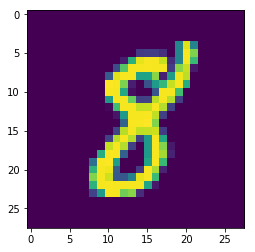

In [10]:
batch_size = 128
num_classes = 10
epochs = 6

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[41])
print("y_train",y_train[41])
#print(x_train[561])
#plt.imshow(x_test[1000])

Input is being reshaped and normalized now

In [8]:
print("Backend:", K.backend())
print("Total Images in Dataset:", x_train.shape[0])

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    print("Channels first")
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    print("Channels last")

Backend: tensorflow
Total Images in Dataset: 60000
Channels last


In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
#convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 290s - loss: 0.3441 - acc: 0.8940 - val_loss: 0.0765 - val_acc: 0.9763
Epoch 2/6
60000/60000 [==============================] - 293s - loss: 0.1159 - acc: 0.9657 - val_loss: 0.0536 - val_acc: 0.9826
Epoch 3/6
60000/60000 [==============================] - 337s - loss: 0.0849 - acc: 0.9746 - val_loss: 0.0423 - val_acc: 0.9869
Epoch 4/6
60000/60000 [==============================] - 333s - loss: 0.0711 - acc: 0.9791 - val_loss: 0.0392 - val_acc: 0.9872
Epoch 5/6
60000/60000 [==============================] - 298s - loss: 0.0621 - acc: 0.9816 - val_loss: 0.0349 - val_acc: 0.9880
Epoch 6/6
60000/60000 [==============================] - 290s - loss: 0.0554 - acc: 0.9834 - val_loss: 0.0405 - val_acc: 0.9874


In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.040493257501
Test accuracy: 0.9874


Now, take an image and convert it to crrect shape ( RGB to Greyscale)

In [11]:
image = misc.imread('7.png')
print (image.shape)

c:\users\gururaj\python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


FileNotFoundError: [Errno 2] No such file or directory: '7.png'

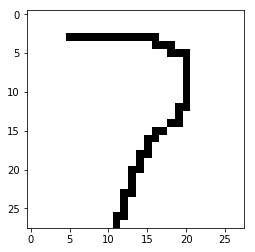

In [16]:
plt.imshow(image) #load
plt.show()  # show the window

In [17]:
def average(pixel):
    return (pixel[0] + pixel[1] + pixel[2]) / 3

In [18]:
grey = np.zeros((image.shape[0], image.shape[1])) # init 2D numpy array
# get row number
for rownum in range(len(image)):
   for colnum in range(len(image[rownum])):
      grey[rownum][colnum] = average(image[rownum][colnum])

C:\Users\smoitra.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


In [19]:
import matplotlib.cm as cm

#plt.imshow(grey, cmap = matplotlib.cm.Greys_r)
#plt.show()

In [20]:
misc.imsave('7-grey.jpg', grey)
print(grey.shape)

(28, 28)


Let's start to validate

(1, 28, 28, 1)


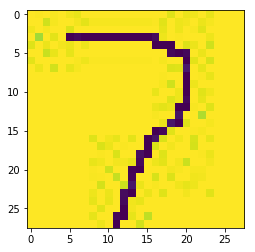

In [21]:
#load the validation img
#testimg1 = load_img('7-gray.jpg')
#plt.imshow(testimg1)

testimg1 = misc.imread('7-grey.jpg')
test_img1 = img_to_array(testimg1)
test_img1 = test_img1.reshape((1,) + test_img1.shape)
print(test_img1.shape)
#predict with our model

plt.imshow(testimg1)
plt.show()

In [22]:
classes = model.predict_classes(test_img1)
print(classes)

1/1 [==============================] - 0s
[8]
